# Multidimensional Arrays in numpy

- NumPy is the Python package providing arrays and matrices.
- It is used **everywhere** in data science.
- NumPy is a *lot* faster than standard Python.

We saw numpy arrays in DSC 10.

In [1]:
import numpy as np
arr = np.array([10, 20, 42, -77])
arr

array([ 10,  20,  42, -77])

The elements of an array are accessed with `[index]`:

In [2]:
arr

array([ 10,  20,  42, -77])

In [3]:
arr[0]

10

In [4]:
arr[3]

-77

In [5]:
arr[-1]

-77

Arrays have useful features, like elementwise arithmetic.

In [6]:
np.array([10, 20, 42, -77]) + 5

array([ 15,  25,  47, -72])

In [7]:
np.array([10, 20, 42, -77]) * 20

array([  200,   400,   840, -1540])

In [8]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

x + y

array([5, 7, 9])

Numpy also provides **multidimensional arrays**, or **matrices**:

In [9]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Accessing an element is done with `[row_index, col_index]`:

In [10]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [11]:
A[0,0]

1

In [12]:
A[0,2]

3

In [13]:
A[1,1]

5

If only one index is provided, an entire *row* is returned:

In [14]:
A[0]

array([1, 2, 3])

In [15]:
A[1]

array([4, 5, 6])

In [16]:
A[2]

array([7, 8, 9])

- If you want a column, you'll have to use the slicing operator, `:`.
- `:` without a start and end basically means "everything"

In [17]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [18]:
A[:,0]

array([1, 4, 7])

In [19]:
A[:,1]

array([2, 5, 8])

In [20]:
A[:,2]

array([3, 6, 9])

## Arithmetic

Multidimensional arrays support elementwise arithmetic, too:

In [21]:
A * 2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [22]:
A + 10

array([[11, 12, 13],
       [14, 15, 16],
       [17, 18, 19]])

In [23]:
A + A

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

Note that `*` performs *elementwise* multiplication, not *matrix* multiplication.

In [24]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [25]:
A * A

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

2-d arrays and 1-d arrays interact through **broadcasting**:

In [26]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [27]:
x = np.array([10, 100, 1000])

In [28]:
A - x

array([[  -9,  -98, -997],
       [  -6,  -95, -994],
       [  -3,  -92, -991]])

In [29]:
A * x

array([[  10,  200, 3000],
       [  40,  500, 6000],
       [  70,  800, 9000]])

- Most numpy methods take an `axis=` argument.
- `axis=0` is "by row"; `axis=1` is "by column"

In [30]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [31]:
A.sum(axis=0)

array([12, 15, 18])

In [32]:
A.sum(axis=1)

array([ 6, 15, 24])

In [33]:
A.sum()

45

## Matrix Math

Matrix multiplication is performed with `@`:

In [34]:
A @ A

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

In [35]:
A @ x

array([3210, 6540, 9870])

Transposing a matrix is done with `.T`:

In [36]:
A.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [37]:
A.T @ A

array([[ 66,  78,  90],
       [ 78,  93, 108],
       [ 90, 108, 126]])

- **Caveat**: 1 dimensional arrays are different from n x 1 arrays.
- One consequence: they can't be transposed.

In [38]:
x

array([  10,  100, 1000])

In [39]:
x.T

array([  10,  100, 1000])

A 1-d array can be converted to a 2-d array with `np.newaxis`:

In [40]:
x[:, np.newaxis]

array([[  10],
       [ 100],
       [1000]])

In [41]:
x[np.newaxis, :]

array([[  10,  100, 1000]])

Now the array can be transposed:

In [42]:
x

array([  10,  100, 1000])

In [43]:
x[:, np.newaxis]

array([[  10],
       [ 100],
       [1000]])

In [44]:
x[:, np.newaxis].T

array([[  10,  100, 1000]])

## Example: kNN with numpy

Example 1: Given two arrays, `x` and `z`, representing vectors in $\mathbb R^d$, compute the distance between them:

In [45]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

In [46]:
x - y

array([-3, -3, -3])

In [47]:
np.sum((x - y)**2)**0.5

5.196152422706632

Example 2: Given an $n \times d$ array `X` and a $d$-array `z`, compute the distance from `z` to every row of `X`.

In [48]:
X = np.random.randint(-10, 10, (5, 3))
z = np.array([1, 2, 3])

In [49]:
X

array([[  6,   8, -10],
       [  2, -10,   5],
       [  4,   8,  -3],
       [ -9,   1, -10],
       [-10,   8,  -6]])

In [50]:
z

array([1, 2, 3])

In [51]:
X - z

array([[  5,   6, -13],
       [  1, -12,   2],
       [  3,   6,  -6],
       [-10,  -1, -13],
       [-11,   6,  -9]])

In [52]:
np.sqrt(np.sum((X - z)**2, axis=1))

array([15.16575089, 12.20655562,  9.        , 16.43167673, 15.42724862])

Example: perform NN classification in numpy.

In [53]:
X = np.random.randint(-10, 10, (1000, 30))
z = np.random.randint(-10, 10, 30)
y = np.random.randint(0, 2, len(X))

In [54]:
distances = np.sqrt(np.sum((X - z)**2, axis=1))

In [55]:
np.argmin(distances)

30

In [56]:
y[np.argmin(distances)]

0

## Demo

### Handwritten digit classification

The file `mnist.npz` contains a bunch of images of handwritten digits.

In [57]:
data = np.load('mnist.npz')

X = data['train'].T
y = data['train_labels'].flatten().astype(int)
Z = data['test'].T
z_test = data['test_labels'].flatten().astype(int)

X = X[(y == 3) | (y == 7)]
y = y[(y == 3) | (y == 7)]
Z = Z[(z_test == 3) | (z_test == 7)]

Each row of `X` is a vector in $\math 784$ representing a 28 x 28 image.

In [58]:
X.shape

(12396, 784)

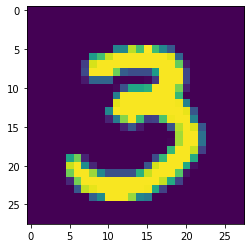

In [59]:
import matplotlib.pyplot as plt
plt.imshow(X[1500].reshape(28, -1))

Let's try to classify previously unseen images. First, we'll make `nn_classify()` with numpy:

In [60]:
def nn_classify(X, y, z):
    distances = np.sqrt(np.sum((X - z)**2, axis=1))
    return y[np.argmin(distances)]

Here is an image that the computer hasn't seen before:

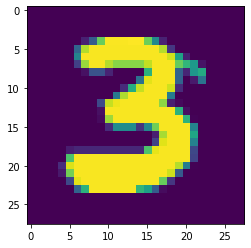

In [61]:
test_image_number = np.random.choice(len(Z))
plt.imshow(Z[test_image_number].reshape(28, -1))

What is its predicted label according to the NN classifier?

In [62]:
nn_classify(X, y, Z[test_image_number])

3